# Описание проекта

# Контекст
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Оглавление <a id='Оглавление'></a>

### Подготовка
1. [Загрузка библиотек](#1)
2. [Загрузка датасетов и их проверка на наличие пропусков и на правильность выгрузки](#2)

### Приоритизация гипотез
3. [Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.](#3)
4. [Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.](#4)
5. [Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.](#5)

### Анализ A/B-теста
6. [Проверка корректности распределения на группы A/B](#6)

**Кумулятивные метрики**

7. [Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.](#7)
8. [Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.](#8)
9. [Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.](#9)
10. [Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.](#10)
11. [Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.](#11)

**Анализ выбросов и всплесков**

12. [Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.](#12)
13. [Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.](#13)
14. [Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.](#14)
15. [Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.](#15)
16. [Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.](#16)
17. [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.](#17)
18. [Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.](#18)
19. [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.](#19)

**Принятие решения по результатам теста**

20. [Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.](#20)

# Подготовка
<a id='1'></a>
### Загрузка библиотек 
[*Назад к оглавлению*](#Оглавление)

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import datetime as dt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

## Часть 

### Задача 
* Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

* Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

<a id='2'></a>
### Загрузка датафрейма и его анализ, проверим их на наличие пропусков и соответствие типам данных, а также правильность выгрузки
[*Назад к оглавлению*](#Оглавление)

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis.describe().T 

,count,mean,std,min,25%,50%,75%,max
Reach,9.0,4.777778,3.153481,1.0,3.0,3.0,8.0,10.0
Impact,9.0,4.777778,3.192874,1.0,3.0,3.0,7.0,10.0
Confidence,9.0,5.555556,3.045944,1.0,3.0,7.0,8.0,9.0
Efforts,9.0,4.888889,2.803767,1.0,3.0,5.0,6.0,10.0


In [5]:
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [6]:
pd.options.display.max_colwidth = 100
print(hypothesis)

                                                                                            hypothesis  \
0   Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
1                            Запустить собственную службу доставки, что сократит срок доставки заказов   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
4                     Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей   
5             Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...   
7     Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
8                                             

#### Вывод:  
В данных нет пропусков и аномалий. Датафрейм готов к работе

# Приоритезация гипотез
<a id='3'></a>
### Приоритезация гипотез методом ICE 
[*Назад к оглавлению*](#Оглавление)

In [7]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [8]:
hypothesis_ICE = hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)

In [9]:
hypothesis_ICE

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


##### Вывод 
По фреймворку ICE наибольшую оценку имели гпиотезы 8,0 и 7.

<a id='4'></a>
### Приоритезация гипотез методом RICE 
[*Назад к оглавлению*](#Оглавление)

In [10]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [11]:
hypothesis_RICE = hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

In [12]:
hypothesis_RICE

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


#### Вывод 
После применения фреймворка RICE приоритеты изменились на гпиотезы 7,2 и 0. 

### Посмотрим, как изменилась приоритизация гипотез при применении RICE вместо ICE.

In [13]:
hypothesis_RICE

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:**
Заметим, что без изменений остались только 4 гипотеза: **Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа** и 6 гипотеза: **Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов**. 

Это можно объяснить тем, что Параметр охвата (Reach), использующийся в методе RICE изменил всю приоритетность и в случае фреймворка ICE в отличие от RICE мы не учитывали охват изменений, тогда как это важная составляющая оценки гипотез.

В нашем случае наиболее приоритетными гипотезами будут 7, 2, 0.

# Анализ A/B-теста
[*Назад к оглавлению*](#Оглавление)

### Загрузка датафрейма и его анализ.
#### Загрузка датафрейма ORDERS

In [14]:
orders = pd.read_csv('/datasets/orders.csv')

In [15]:
orders['date'] = orders['date'].astype('datetime64[D]')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))
print('\nНачальная дата {}, конечная дата {}\n'.format(orders['date'].min(), orders['date'].max()))
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))



Начальная дата 2019-08-01, конечная дата 2019-08-31



In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [17]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


#### Загрузка датафрейма VISITORS

In [18]:
visitors = pd.read_csv('/datasets/visitors.csv')

In [19]:
visitors['date'] = visitors['date'].astype('datetime64[D]')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))
print('\nНачальная дата {}, конечная дата {}\n'.format(visitors['date'].min(), visitors['date'].max()))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


Начальная дата 2019-08-01, конечная дата 2019-08-31



In [20]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [21]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


#### Вывод 
Данные прочитали, изменили тип данных у столбцов с датами, выгрузка совершена корректно, даты совпадают.

<a id='6'></a>
### Проверим корректность распределения на группы A/B

In [22]:
group_sizes = orders.groupby(['visitorId', 'group']).size().reset_index()
group_sizes.columns = ['visitorId', 'group', 'count']
group_sizes = group_sizes.query('count > 1').sort_values(by='visitorId')
group_sizes

,visitorId,group,count
45,199603092,A,4
58,237748145,A,4
63,249864742,B,3
94,366673373,A,2
104,393266494,B,2
...,...,...,...
1045,4109358064,A,2
1050,4134830387,B,2
1065,4186807279,B,2
1079,4256040402,A,7


In [23]:
potentially_broken_users_list = list(zip(group_sizes['visitorId'], group_sizes['group']))
potentially_broken_users_dict = defaultdict(list)
for user, group in potentially_broken_users_list:
    potentially_broken_users_dict[user].append(group)

inappropriate_users = [user for user in potentially_broken_users_dict if len(potentially_broken_users_dict[user]) > 1]
inappropriate_orders = orders.query('visitorId in @inappropriate_users')
inappropriate_orders_grouped = (inappropriate_orders
                        .groupby(['visitorId', 'group', 'date'])
                        .agg({'transactionId': 'nunique', 'revenue': 'sum'})
                   )
inappropriate_orders_grouped

transactionId  revenue
visitorId  group date                              
1230306981 A     2019-08-09              3    18440
           B     2019-08-09              2    12840
2038680547 A     2019-08-04              2     4070
                 2019-08-17              1     3470
                 2019-08-22              1      760
                 2019-08-25              1      270
           B     2019-08-04              1     2800
                 2019-08-15              1     1680
                 2019-08-29              1     2420
2378935119 A     2019-08-10              1    58220
                 2019-08-15              1     1650
                 2019-08-17              1      310
                 2019-08-22              1     3390
           B     2019-08-09              1    30649
                 2019-08-10              1     2640
                 2019-08-25              1    21220
                 2019-08-28              2    24860
2458001652 A     2019-08-04              1      340
                 2019-08-06              1     1620
                 2019-08-07              1    17379
                 2019-08-11              1     8280
                 2019-08-22              1     5190
           B     2019-08-05              1     2420
                 2019-08-06              2    14030
                 2019-08-08              1     5227
                 2019-08-09              1     5227
                 2019-08-25              1     2385
4256040402 A     2019-08-01              1     5800
                 2019-08-12              1       50
                 2019-08-17              1     1550
                 2019-08-20              1    17650
                 2019-08-23              1    16950
                 2019-08-27              1     1630
                 2019-08-31              1     5170
           B     2019-08-08              1    58220
                 2019-08-16              1    56650
                 2019-08-18              1    10970
                 2019-08-31              1     1850

Так как в рамках этого A/B теста не пользователей, а сесии разделяли на группы, то проблемы в том, что пользователь попал в обе группы, нет. Просто так вышло, что он совершил несколько сессий, которые определились в разные группы

In [24]:
print('Проверка на пропуски')
print(orders.isnull().sum())

print('Проверка на дубликаты')
print(orders.duplicated().sum())

Проверка на пропуски
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
Проверка на дубликаты
0


In [25]:
print('Проверка на пропуски')
print(visitors.isnull().sum())

print('Проверка на дубликаты')
print(visitors.duplicated().sum())

Проверка на пропуски
date        0
group       0
visitors    0
dtype: int64
Проверка на дубликаты
0


* Дубликатов и пропущеных значений не обнаружено.
* Данные прочитали, изменили тип данных у столбцов с датами, выгрузка совершена корректно, даты совпадают.

## Кумулятивные метрики
<a id='7'></a>
### Построим график кумулятивной выручки по группам 
[*Назад к оглавлению*](#Оглавление)

Text(0.5, 1.0, 'Графики кумулятивной выручки по группам A/B')

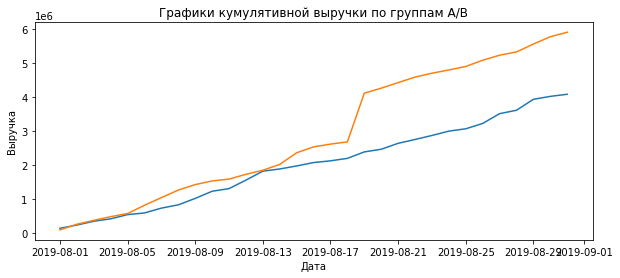

In [26]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]


# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(10,4))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Графики кумулятивной выручки по группам A/B')

#plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
#            #arrowprops=dict(facecolor='g'))
#plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
#            #arrowprops=dict(facecolor='g'))
#plt.legend()

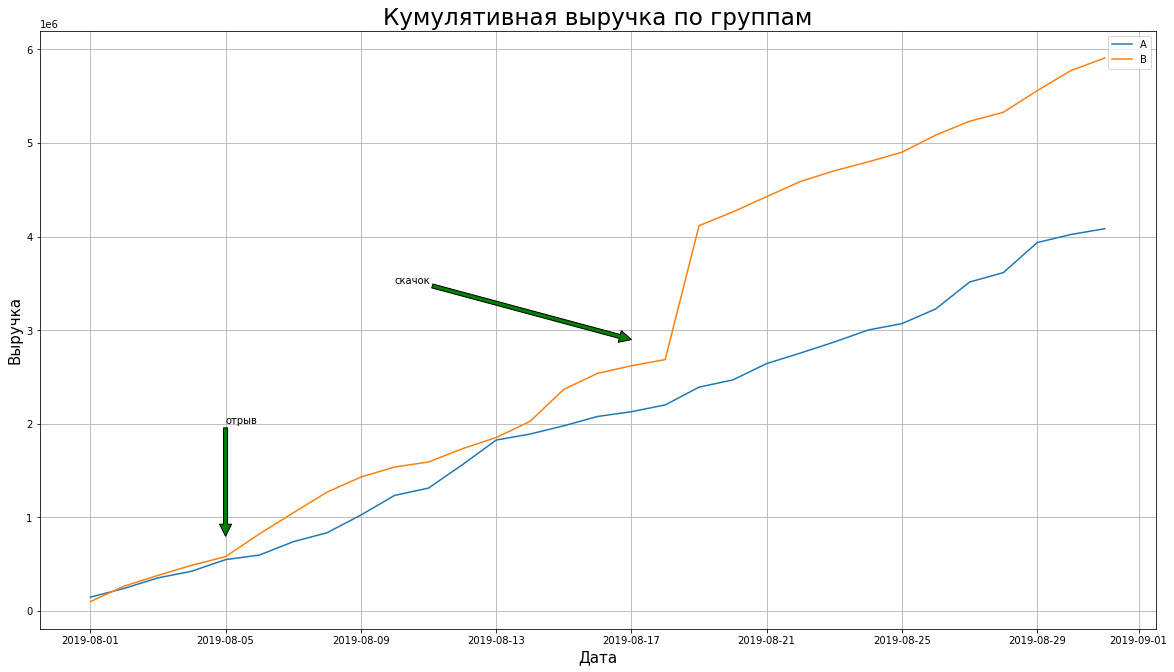

In [27]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize = (20,11))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по группам', size = 23)
plt.xlabel('Дата', size = 15)
plt.ylabel('Выручка', size = 15)
plt.grid()
plt.annotate('скачок', xy=('2019-08-17', 2900000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g')) 
plt.legend()
plt.show()

Как мы видим, группа B стабильно показывает большую выручку чем группа A, те группа В на графике выше группы А

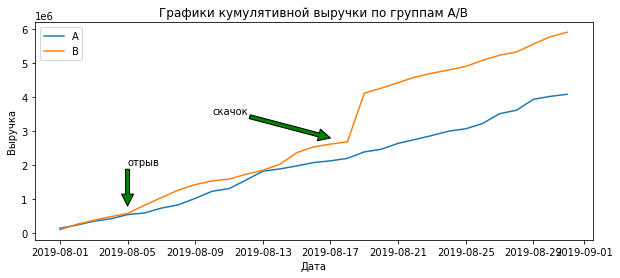

In [28]:
plt.figure(figsize=(10,4))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Графики кумулятивной выручки по группам A/B')

plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g'))

plt.legend();

<a id='8'></a>
### Построим график кумулятивного среднего чека по группам 
[*Назад к оглавлению*](#Оглавление)

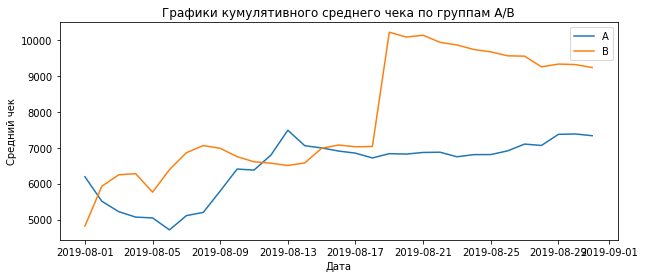

In [29]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]
plt.figure(figsize=(10,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Графики кумулятивного среднего чека по группам A/B')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend();

Как мы видим, средний чек в группе B почти всё время был выше, но нас должно 
смутить его резкое колебание во второй половине графика, есть вероятность что оно обусловлено аномалиями

<a id='9'></a>
### Построим график относительного изменения кумулятивного среднего чека группы B к группе A
[*Назад к оглавлению*](#Оглавление)

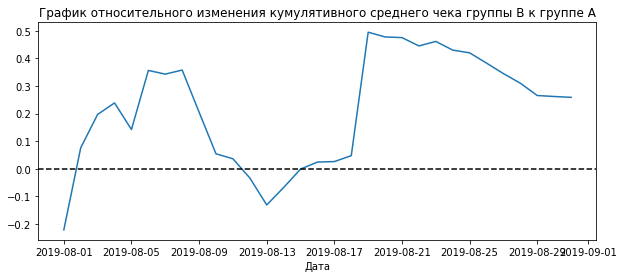

In [30]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10,4))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.show()

Как мы и говорили, колебания слишком резкие, необходимо будет проверить данные на наличие аномальных пользователей

<a id='10'></a>
### Построим график кумулятивной конверсии по группам
[*Назад к оглавлению*](#Оглавление)

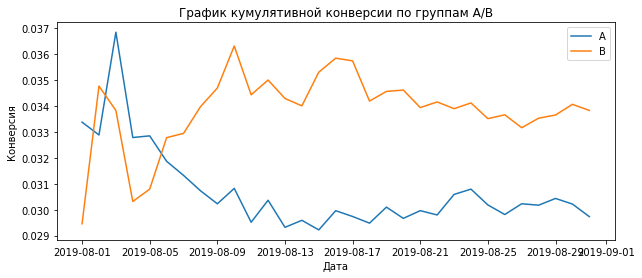

In [31]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(10,4))
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам A/B')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend();



Группа B стабильно показывает большую конверсию чем группа A, это обнадеживает

<a id='11'></a>
### Построим график относительного изменения кумулятивной конверсии группы B к группе A
[*Назад к оглавлению*](#Оглавление)

No handles with labels found to put in legend.


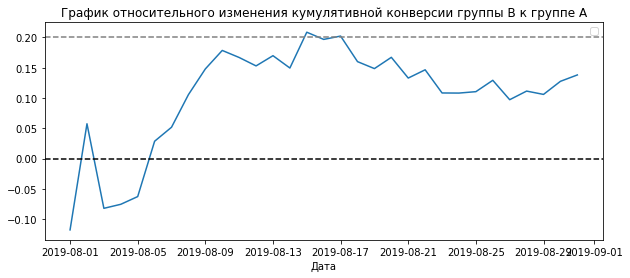

In [32]:
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10,4))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.legend()
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.xlabel('Дата')
plt.show()

Конверсия в группе B стабильно лучше конверсии в группе A на 10% по просшествии 1 недели после начала

## Анализ выбросов и всплесков
<a id='12'></a>
### Построим точечный график количества заказов по пользователям
[*Назад к оглавлению*](#Оглавление)

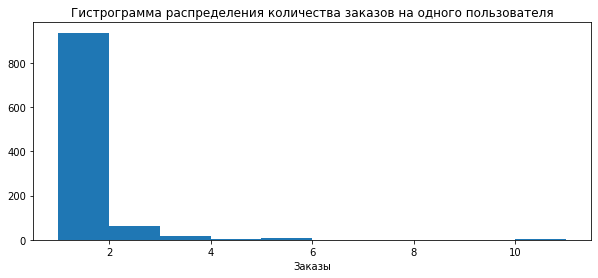

In [33]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']
plt.figure(figsize=(10,4))
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.xlabel('Заказы')
plt.hist(ordersByUsers['orders']); 

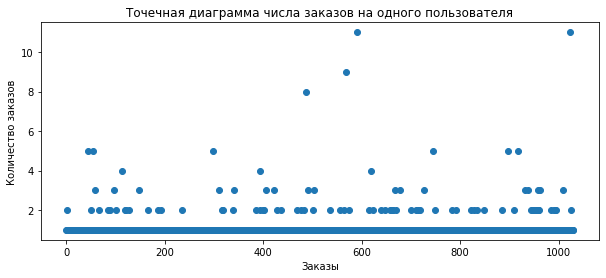

In [34]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(10,4))
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.xlabel('Заказы')
plt.ylabel('Количество заказов')
plt.scatter(x_values, ordersByUsers['orders']) ;

Судя по граифкам, подавляющее большинство пользователей не совершает более 2 заказов

<a id='13'></a>
### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
[*Назад к оглавлению*](#Оглавление)

In [35]:
# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Как мы и предполагали, больше 2 заказов совершают только 5% пользователей, а больше 4, только 1%

Количество заказов выше 8 выглядит весьма аномальными. 

<a id='14'></a>
### Построим точечный график стоимостей заказов
[*Назад к оглавлению*](#Оглавление)

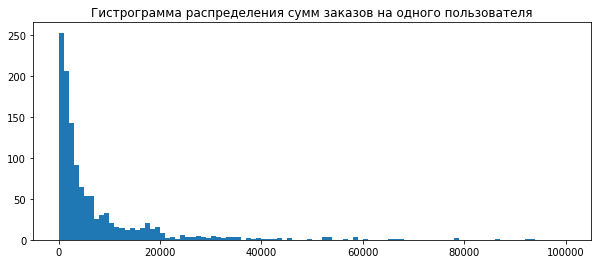

In [36]:
plt.figure(figsize=(10,4))
plt.hist(orders['revenue'], range=(0,100000), bins = 100)
plt.title('Гистрограмма распределения сумм заказов на одного пользователя')
plt.show()

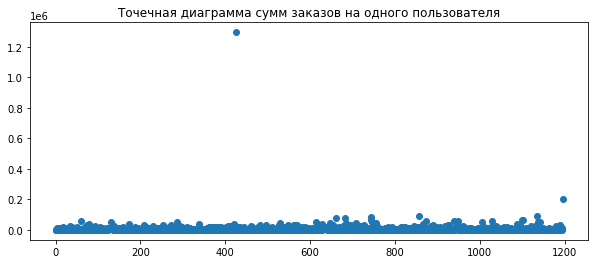

In [37]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10,4))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечная диаграмма сумм заказов на одного пользователя')

plt.show()

Заказ выше 1,2 млн рублей выглядит весьма аномальными. 

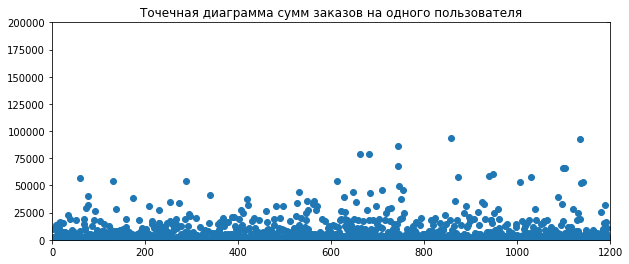

In [38]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10,4))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечная диаграмма сумм заказов на одного пользователя')
plt.axis([0, 1200, 0, 200000])
plt.show()

Из графиков видно, что большая часть стоимости заказов не превышает 25 тысяч рублей. Есть выбросы в районе 30-50 тысяч рублей. Заказ выше 75 тысяч рублей выглядит весьма аномальными. 

<a id='15'></a>
### Посчитаем 95-й и 99-й перцентили сумм заказов на пользователя. Выберем границу для определения аномальных пользователей.
[*Назад к оглавлению*](#Оглавление)

In [39]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более, чем у 5% заказов чек дороже 28000 рублей. И не больше, чем у 1% заказов - дороже 58233 рублей

<a id='16'></a>
### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным
[*Назад к оглавлению*](#Оглавление)

Вероятность того, что наблюдение из популяции А превышает наблюдение из популяции В равна 50%. А обратная гипотеза, что такая вероятность не равна 50%.

H0:наблюдение из популяции А превышает наблюдение из популяции В

H1:наблюдение из популяции B превышает наблюдение из популяции A

In [40]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'visitorId','transactionId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'visitorId','transactionId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))


ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))



        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

P-value значительно меньше 0,05,отвергаем нулевую гипотезу. Анализ "сырых данных" сообщает, что в среднем количество заказов между группами есть статистически значимые различия. Относительный прирост среднего группы В к конверсии группы А равен 13,8%

<a id='17'></a>
### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
[*Назад к оглавлению*](#Оглавление)

In [41]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


P-value больше 0,05 - статистически значимых отличий в среднем чеке между группами нет. Кроме того, относительное различие среднего чека между сегментами 25%

<a id='18'></a>
### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным
[*Назад к оглавлению*](#Оглавление)

Ранее мы уже выяснили, что подавляющее большинство пользователей не делает более 2 заказов и сумма 1 покупки в большинстве случаев не превышает 28 т.р. Очистим данные от аномальных пользователей с превышающими данные лимиты значениями.

In [42]:
#зададим предельные кол-во заказов и сумму покупки для формирования списка аномальных пользователей
limit_orders = 2
limit_revenue = 28000

In [43]:

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > limit_orders]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > limit_orders]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > limit_revenue]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.sort_values())


1099     148427295
18       199603092
928      204675465
23       237748145
37       249864742
           ...    
723     4009017467
627     4120364173
743     4133034833
499     4256040402
662     4266935830
Name: visitorId, Length: 74, dtype: int64


In [44]:
print('Кол-во аномальных пользователей: {}'.format(len(abnormalUsers)))

Кол-во аномальных пользователей: 74


Выяснили множество аномальных пользователей - 74 . После их удаления можно будет считать статистическую значимость. Для этого надо выяснить, есть ли существенные различия между группами с очищенными данными 

<a id='19'></a>
### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным
[*Назад к оглавлению*](#Оглавление)

In [45]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))




0.01304
0.173


P-value значительно меньше 0,05, что может говорить о статистически значимых различиях. Анализ сообщает, что в среднем количество заказов между группами есть статистически значимые различия. Относительный прирост среднего группы В к конверсии группы А равен 17,3%

Как и в случае с сырыми данными, **статистическая значимость достигнута, при этом заменет рост конверсии**.

Сегмент B **значительно лучше** сегмента А.

In [46]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.738
-0.020


* P-value увеличился, но и разница между сегментами сократилась до 2%.
* Средний чек не поменялся, а конверсия выросла 
* P-value больше 0,05, поэтому принимаем нулевую гипотезу

<a id='20'></a>
## Примем решение по результатам теста 
[*Назад к оглавлению*](#Оглавление)

**Варианты принимаемых решений:**
* Остановить тест, зафиксировать победу одной из групп.
* Остановить тест, зафиксировать отсутствие различий между группами.
* Продолжить тест.

    1) Выборка данных имеет корректный размер, проблему подглядывания в результате сравнения групп во время проведения теста мы исключили 

    2) Кумулятивные метрики по выручке, среднему чеку и конверсии почти все время лидировали в группе B. 

У нас на некоторое время возникли сомнения из-за резких колебаний на графике кумулятивного среднего чека в группе B до очистки данных от аномальных пользователей. Наши сомнения подтвердились на этот счет, т.к. после очистки разница между средними чеками стала минимальна, но это не даёт нам повода сомневаться в проведении теста и его результатах. 
Данная разница показателей конверсии между группами и до и после очистки данных является **статистически значимой**, что пользволяет нам сделать вывод о том, что мы можем остановить наш A/B тест и зафиксировать победу группы B!

**Общий вывод из A/B - теста:**
* Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.

* По сырым данным нет статистически значимого различия по среднему чеку между группами. Однако после удаления аномалий статистически значимое различие есть.

* График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.

* График различия среднего чека колеблется: он-то и позволил вам найти аномалии. Сделать из этого графика определённые выводы нельзя.

Исходя из факторов выше следует **остановить тест, признать его неуспешным**